In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
part1=pd.read_csv('_2019-1-24_0226_60k_p1.csv', encoding = 'utf-8')
#part2=pd.read_csv('_2019-1-24_0233_60k_p2.csv')
#part3=pd.read_csv('_2019-1-24_0238_60k_p3.csv')

In [30]:
part1.head()

,reg_created,reg_status,sum,user_id,email,event_id,name,count(*)
0,2018-12-31 23:39:58.0,paid,1250,86505410,07son@list.ru,869512,Кино,1
1,2018-12-31 22:20:32.0,ok,0,90240321,tatyana-paneeva@yandex.ru,870927,Красота и здоровье,1
2,2018-12-31 20:37:19.0,ok,0,11526378,rikka08@mail.ru,870927,Красота и здоровье,1
3,2018-12-31 20:28:45.0,ok,0,89513918,vorobjevanastya@mail.ru,879262,Психология и самопознание,1
4,2018-12-31 20:26:47.0,ok,0,89513918,vorobjevanastya@mail.ru,866413,Иностранные языки,1


In [31]:
grouped = part1.groupby(['email']).count()
#grouped.head()

In [32]:
print len(grouped), '- всего пользователей регавшихся из дайджеста'
print len(grouped.loc[grouped['event_id']== 1]), '- регавшихся из дайджеста только один раз'
print round(100*(len(grouped) - len(grouped.loc[grouped['event_id']== 1]))/float(len(grouped)), 2), '- % регавшихся больше 1 раза'

61372 - всего пользователей регавшихся из дайджеста
39573 - регавшихся из дайджеста только один раз
35.52 - % регавшихся больше 1 раза


__Распределение пользователей от количества регистраций с дайджеста__

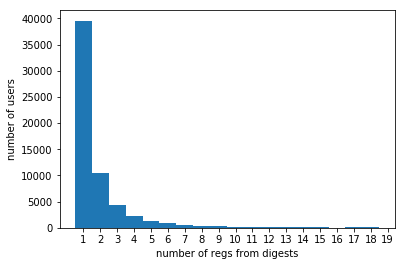

In [33]:
bins = np.arange(1, 20, 1)
plt.hist(grouped['event_id'], bins,  range=(1, 21), align='left')
plt.ylabel('number of users')
plt.xlabel('number of regs from digests')
#plt.hist(grouped['event_id'], bins,  range=(1, 21))
plt.xticks( bins)
plt.show()

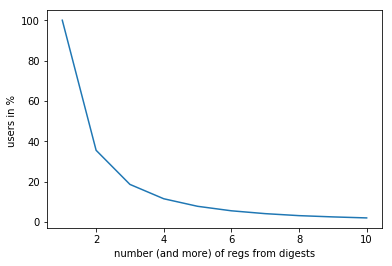

35.52 - % пользователей сделали больше одной регистрации из дайджеста


In [34]:
pers = np.array([])
for i in range(10):
    pers = np.append(pers, 100*len(grouped.loc[grouped['event_id'] > i])/float(len(grouped)) )
plt.plot(np.arange(1,11, 1), pers)
plt.ylabel('users in % ')
plt.xlabel('number (and more) of regs from digests')
plt.show()
print round(pers[1], 2), '- % пользователей сделали больше одной регистрации из дайджеста'

__Только платные события__

In [35]:
pay_only = part1.loc[part1['reg_status'] != 'ok']
pay_grouped = pay_only.groupby(['email']).count()
print round(100*len(pay_grouped)/float(len(grouped)),2), "- % пользователей регистрировались на платные события из дайджеста"

5.36 - % пользователей регистрировались на платные события из дайджеста


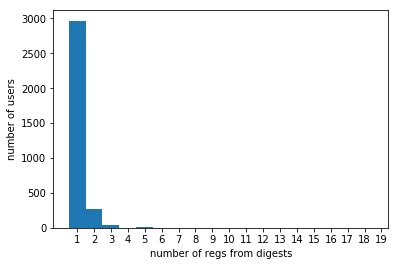

In [36]:
bins = np.arange(1, 20, 1)
plt.hist(pay_grouped['event_id'], bins,  range=(1, 21) , align='left')
plt.ylabel('number of users')
plt.xlabel('number of regs from digests')
plt.xticks( bins)
plt.show()

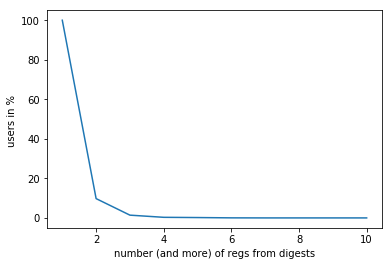

9.77 - % платящих пользователей сделали больше одной регистрации из дайджеста


In [10]:
pay_pers = np.array([])
for i in range(10):
    pay_pers = np.append(pay_pers, 100*len(pay_grouped.loc[pay_grouped['event_id'] > i])/float(len(pay_grouped)) )
plt.plot(np.arange(1,11, 1), pay_pers)
plt.ylabel('users in % ')
plt.xlabel('number (and more) of regs from digests')
plt.show()
print round(pay_pers[1], 2), '- % платящих пользователей сделали больше одной регистрации из дайджеста'

__В разрезе категорий__

In [100]:
grouped_cat = part1.groupby(['name']).count()
grouped_cat['percentage']=100*grouped_cat['reg_created']/grouped_cat['reg_created'].sum()
sort_group = grouped_cat.sort_values('reg_created', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sort_group.head()
#тоже только для платных
#pay_grouped
pay_grouped_cat = pay_only.groupby(['name']).count()
pay_grouped_cat['percentage']=100*pay_grouped_cat['reg_created']/pay_grouped_cat['reg_created'].sum()
sort_pay_group = pay_grouped_cat.sort_values('reg_created', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sort_pay_group.head()

In [96]:
#df = pd.DataFrame(grouped_cat)
#df.head()
#plt.pie(sort_group['reg_created'], labels = sort_group.index)
#for i in df.index.tolist():
#plt.show()

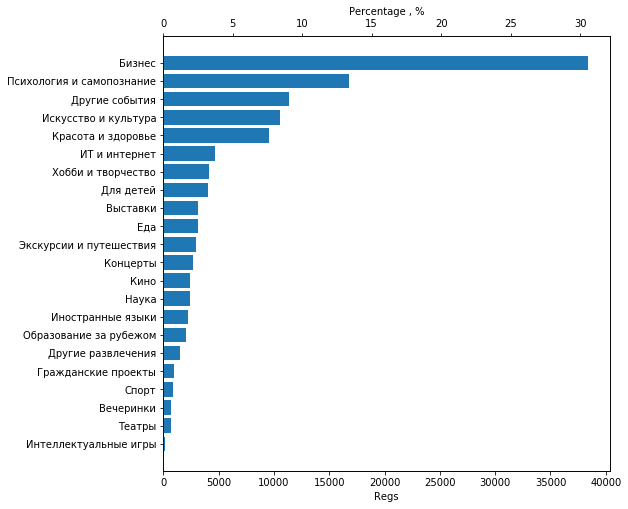

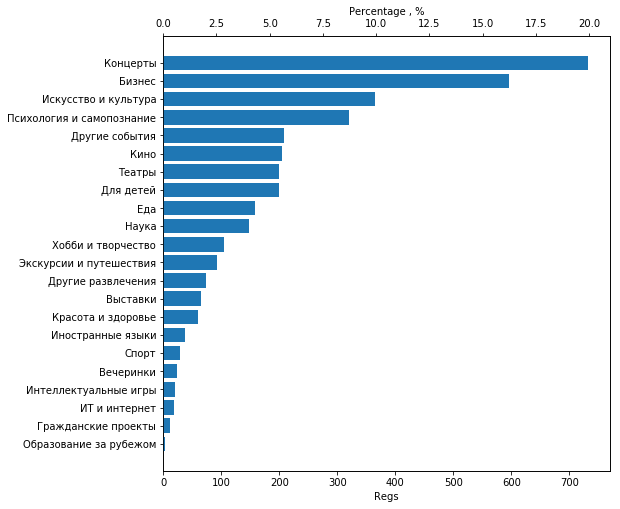

In [101]:

fig, ax1 = plt.subplots()
#plt.subplot(1, 1, 1)
ax1.barh(sort_group.index, sort_group['reg_created'])
ax1.set_xlabel('Regs')
ax2 = ax1.twiny()
#plt.subplot(1, 2, 1)
ax2.barh(sort_group.index, sort_group['percentage'])
ax2.set_xlabel('Percentage , %')
plt.gcf().set_size_inches(8, 8)
# платные 
fig_p, ax1_p = plt.subplots()
#plt.subplot(1, 2, 2)
ax1_p.barh(sort_pay_group.index, sort_pay_group['reg_created'])
ax1_p.set_xlabel('Regs')
ax2_p = ax1_p.twiny()
ax2_p.barh(sort_pay_group.index, sort_pay_group['percentage'])
ax2_p.set_xlabel('Percentage , %')
plt.gcf().set_size_inches(8, 8)
plt.show()